In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("Consumer_Reviews_of_Amazon_Products_May19.csv")

In [4]:
data.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [74]:
#Question No 1
data.shape

(28332, 24)

In [88]:
#Question No 2
data['primaryCategories'].unique()
def ShortName(category):
     if category == 'Health & Beauty':
        return "H&B"
     if category == 'Electronics':
        return "E"
     if category == 'Office Supplies':
        return "O"
     if category == 'Animals & Pet Supplies':
        return "A&P"
     if category == 'Home & Garden':
        return "H&G"
     if category == 'Electronics,Furniture':
        return "E,F"
     if category == 'Toys & Games,Electronics':
        return "T&G,E"
     if category == 'Electronics,Media':
        return "E,M"
     if category == 'Office Supplies,Electronics':
        return "O,E"


In [94]:
data['shortcategoryname'] = data['primaryCategories'].apply(ShortName)

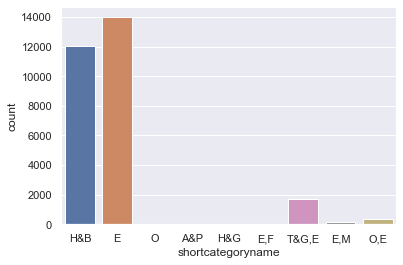

In [95]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="shortcategoryname", data=data)

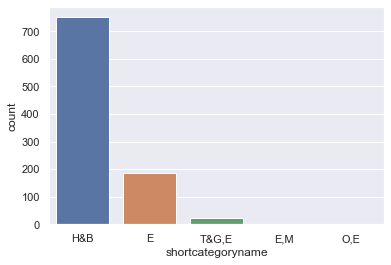

In [116]:
#Question No 3
dataset = data[data['reviews_rating']==1]
sns.set(style="darkgrid")
sns.countplot(x="shortcategoryname", data=dataset)

In [6]:
#Question No 4
data_pos_feedback =  data[data['reviews_rating']==5]['reviews_text'].tolist()

In [7]:
data_neu_feedback =  data[data['reviews_rating']==3]['reviews_text'].tolist()

In [8]:
data_neg_feedback = data[data['reviews_rating']==1]['reviews_text'].tolist()

In [9]:
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('tagsets')
from nltk import word_tokenize, pos_tag
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [10]:
string = ''
for w in data_neg_feedback:
    string = string + ' ' + w
string = string.lstrip()
string1 = string[:50]
print(string1)

I don't know if I would buy thus brand again seems


In [11]:
print(pos_tag(word_tokenize(string1)))

[('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('know', 'VB'), ('if', 'IN'), ('I', 'PRP'), ('would', 'MD'), ('buy', 'VB'), ('thus', 'RB'), ('brand', 'NN'), ('again', 'RB'), ('seems', 'VBZ')]


In [12]:
#Question No 5
#%pip install WordCloud
from wordcloud import WordCloud

In [20]:
from nltk.corpus import stopwords
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sohan.Jalan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
stop_words = set(stopwords.words('english'))

In [16]:
word_tokens = word_tokenize(string) 
word_tokens[0:5]

['I', 'do', "n't", 'know', 'if']

In [27]:
filtered_tokens = [w for w in word_tokens if not w in stop_words]
filtered_tokens[0:5]

['I', "n't", 'know', 'I', 'would']

In [28]:
text1 = pd.Series(filtered_tokens).str.cat(sep = ' ')
text1[0:20]

"I n't know I would b"

(-0.5, 1599.5, 799.5, -0.5)

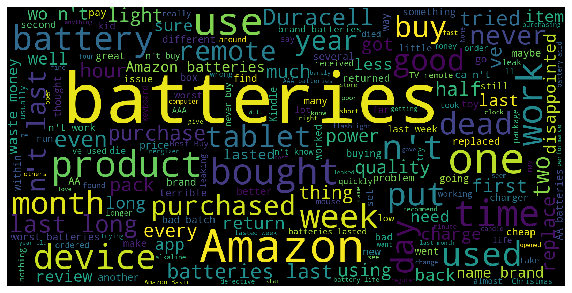

In [31]:
wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(text1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")

In [33]:
from nltk.probability import FreqDist
fdist = FreqDist(filtered_tokens)
fdist.most_common(20)

[('.', 2577),
 ('I', 1409),
 (',', 873),
 ('batteries', 864),
 ("n't", 374),
 ('!', 338),
 ('Amazon', 239),
 ('last', 237),
 ('battery', 182),
 ('These', 147),
 ('one', 146),
 ("'s", 142),
 ('use', 141),
 ('...', 141),
 ('work', 140),
 ('The', 139),
 ('buy', 137),
 ('would', 131),
 ('get', 125),
 ('used', 118)]

(-0.5, 1599.5, 799.5, -0.5)

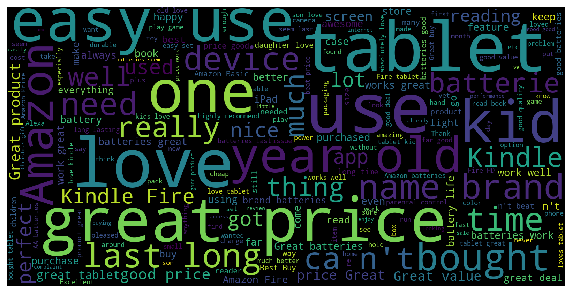

In [36]:
#Question No 6
string = ''
for w in data_pos_feedback:
    string = string + ' ' + w
string = string.lstrip()
word_tokens = word_tokenize(string) 
filtered_tokens = [w for w in word_tokens if not w in stop_words]
text = pd.Series(filtered_tokens).str.cat(sep = ' ')
wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")

In [38]:
fdist = FreqDist(filtered_tokens)
fdist.most_common(20)

[('.', 32159),
 ('I', 13775),
 (',', 11215),
 ('!', 7562),
 ('batteries', 5255),
 ('great', 4456),
 ('tablet', 3929),
 ('price', 3713),
 ('good', 2850),
 ('use', 2839),
 ('Great', 2785),
 ("n't", 2222),
 ("'s", 2162),
 ('love', 2156),
 ('The', 2113),
 ('It', 2014),
 ('Amazon', 2000),
 ('This', 1895),
 ('one', 1748),
 ('loves', 1737)]

(-0.5, 1599.5, 799.5, -0.5)

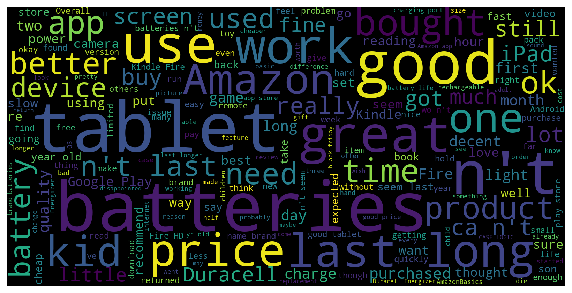

In [40]:
#Question No 7
string = ''
for w in data_neu_feedback:
    string = string + ' ' + w
string = string.lstrip()
word_tokens = word_tokenize(string) 
filtered_tokens = [w for w in word_tokens if not w in stop_words]
text = pd.Series(filtered_tokens).str.cat(sep = ' ')
wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")

In [44]:
fdist = FreqDist(filtered_tokens)
fdist.most_common(100)

[('.', 2471),
 ('I', 1214),
 (',', 1010),
 ("n't", 448),
 ('batteries', 346),
 ('tablet', 296),
 ('good', 238),
 ('last', 223),
 ("'s", 220),
 ('long', 204),
 ('The', 196),
 ('price', 178),
 ('It', 171),
 ('use', 161),
 ('like', 159),
 ('get', 142),
 ('Amazon', 136),
 ('great', 134),
 ('...', 127),
 ('one', 122),
 ('would', 121),
 ('bought', 118),
 ('kids', 110),
 ('apps', 106),
 ('They', 103),
 ('!', 101),
 ('This', 100),
 ('work', 96),
 ('time', 88),
 ('battery', 87),
 ('better', 87),
 ('old', 86),
 ('(', 85),
 ('little', 79),
 ('Fire', 78),
 ('product', 76),
 (')', 75),
 ('screen', 75),
 ('seem', 71),
 ('games', 70),
 ('slow', 69),
 ('buy', 66),
 ('Duracell', 65),
 ('store', 65),
 ("'m", 65),
 ('used', 64),
 ('much', 63),
 ('These', 61),
 ('really', 61),
 ('Not', 61),
 ('fine', 61),
 ('need', 60),
 ('could', 60),
 ('got', 58),
 ('But', 58),
 ('ca', 58),
 ('quality', 57),
 ('well', 57),
 ('8', 56),
 ('Google', 55),
 ('play', 54),
 ('2', 53),
 ('still', 51),
 ('life', 51),
 ('ok', 49)

In [58]:
#Question No 8
data_pos_feedback_electronic =  data.loc[(data['reviews_rating']==5) & (data['primaryCategories']=='Electronics')]['reviews_text'].tolist()
data_pos_feedback_electronic[0:5]

['Great case to keep everything in its place! My husband love it!!!! Holds a lot of cds!',
 'After discarding and getting rid of broken cd cases, broken cds, and selecting those ones we really like, this binder turned up to be an excellent option to store our favourite cds and dvds and keep them in a small space at our living room, giving us the choice to donate or get rid of those cds towers that took a lot of room, despite looking nice. And because you can turn the pages, you can spot the cd you want to play without the hassle of taking it from a case that is falling apart. After storing them cds, all the cases and printed covers went straight to the recycling centre. We have a small version to put those cds my husband would like to listen to whenever he must drive away for work.',
 'A few dollars more, but I am boycotting amazon',
 'Pros: Standard Echo. Cons: Older generation Echo. Other Thoughts: Arrived on time and was new in box.',
 'Pros: Got it for under 50, much impressive sou

(-0.5, 1599.5, 799.5, -0.5)

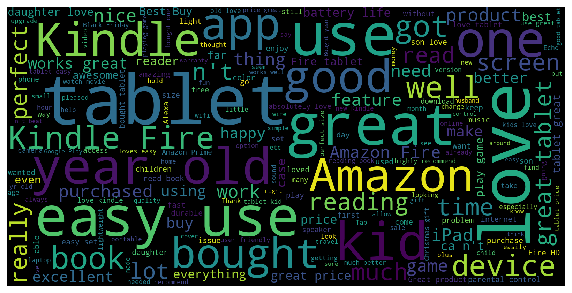

In [60]:
string = ''
for w in data_pos_feedback_electronic:
    string = string + ' ' + w
string = string.lstrip()
word_tokens = word_tokenize(string) 
filtered_tokens = [w for w in word_tokens if not w in stop_words]
text = pd.Series(filtered_tokens).str.cat(sep = ' ')
wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")

In [63]:
fdist = FreqDist(filtered_tokens)
fdist.most_common(40)

[('.', 18548),
 ('I', 7860),
 (',', 6357),
 ('!', 3799),
 ('tablet', 3456),
 ('great', 2348),
 ('use', 2018),
 ('love', 1561),
 ('It', 1546),
 ('This', 1485),
 ('The', 1472),
 ('loves', 1380),
 ('one', 1369),
 ("'s", 1366),
 ('easy', 1254),
 ('price', 1189),
 ('old', 1114),
 ("n't", 1108),
 ('bought', 1093),
 ('My', 1068),
 ('Great', 1033),
 ('Amazon', 988),
 ('kids', 985),
 ('Kindle', 978),
 ('good', 970),
 ('games', 911),
 ('year', 845),
 ('books', 843),
 ('Fire', 842),
 ('apps', 763),
 ('screen', 762),
 ('like', 706),
 ('kindle', 696),
 ('product', 682),
 ('read', 651),
 ('She', 644),
 ('reading', 643),
 ('much', 641),
 ('would', 640),
 ('well', 635)]

In [65]:
#Question No 9
data_pos_feedback_electronic =  data.loc[(data['reviews_rating']==5) & (data['primaryCategories']=='Electronics')]['reviews_title'].tolist()
data_pos_feedback_electronic[0:5]

['Excellent product',
 'It was a much needed storage',
 'it was worth it',
 'Arrived as described.',
 'Much better sound sound than 2nd generation']

In [67]:
string = ''
for w in data_pos_feedback_electronic:
    string = string + ' ' + w
string = string.lstrip()
string1 = string[:50]
print(string1)

Excellent product It was a much needed storage it 


In [68]:
print(pos_tag(word_tokenize(string1)))

[('Excellent', 'JJ'), ('product', 'NN'), ('It', 'PRP'), ('was', 'VBD'), ('a', 'DT'), ('much', 'RB'), ('needed', 'VBN'), ('storage', 'NN'), ('it', 'PRP')]
